# Titanic Survival Prediction
 **Performed by:** <br>
 Name: Giridhar Sreekumar <br>
 Date: 11 January 2026

# ***Description:*** Predict whether a passenger survived the Titanic disaster based on features like  age, class, gender, etc.

In [33]:
## Initially, all the required libraries are imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [98]:
## Titanic dataset is loaded from seaborn
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Exploratory Data Analysis (EDA)

The purpose of this exploratory data analysis is to understand the **structure**, **distribution**, and **relationships** within the Titanic dataset. The dataset contains both numerical and categorical features such as age, gender, passenger class, and fare, which are used to predict passenger survival.

EDA is performed using summary statistics and visualizations to **identify survival patterns**, **analyze feature influence**, and **understand class distribution**. The insights obtained from this step help in selecting relevant features and building an effective classification model for survival prediction.


### ***Initial Analysis***


Initial analysis is performed to gain a basic understanding of the dataset and its structure. This step involves examining the number of observations and features, data types, and the presence of missing or duplicate values. Basic descriptive statistics such as measures of central tendency and dispersion are also analyzed to understand the overall distribution and range of the features.

This analysis helps in assessing the quality of the dataset and determining whether any data cleaning or preprocessing steps are required before proceeding with detailed visualization and modeling.


In [35]:
df.shape

(891, 15)

In [36]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Missing and Duplicate Values are checked**

In [38]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [18]:
df.duplicated().sum()

np.int64(107)

In [21]:
##Descriptive Statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
### Target Variable Analysis
df['survived'].value_counts()

,count
survived,
0,549
1,342


### Conclusion of Initial Inspection

The Titanic dataset was successfully loaded and inspected to understand its structure and features. The dataset contains both numerical and categorical variables along with missing values, making it suitable for demonstrating real-world data cleaning, preprocessing, and classification techniques.


## Data cleaning and preprocessing
Since the presence of missing values and duplicate entries were found, this is to be dealt with before moving on to further analysis and visualisation

In [99]:
### Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()


np.int64(0)

In [51]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Handling Missing values

- `age` : missing values are filled with meadian age (because mean might be skewed due to presence of varied range of age).
- `embarked` : missing values are filled with most frequent port(mode).
- `deck`: Almost 70% contains of the missing values and is also found not to be much influential in our model, hence dropped completely.

In [100]:
## Drop deck column
df = df.drop('deck',axis=1)

## Fill age with median
df['age'].fillna(df['age'].median(), inplace=True)

## Fill embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1947287702.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1947287702.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [101]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

/tmp/ipython-input-395761809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [56]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### Conclusion of Missing Value Handling
All missing values have been handled appropriately. The dataset now contains allows complete information, allowing for accurate analysis, feature encoding, and model training.

In [57]:
## ==========================================

## Visualizations

After cleaning the dataset and handling missing values, visualizations are performed to uncover patterns in the data. The aim is to understand relationships between features and survival, identify influential variables, and observe distributions that can inform model selection and feature engineering.


## 1. Target Variable Distribution
* Shows the class distribution

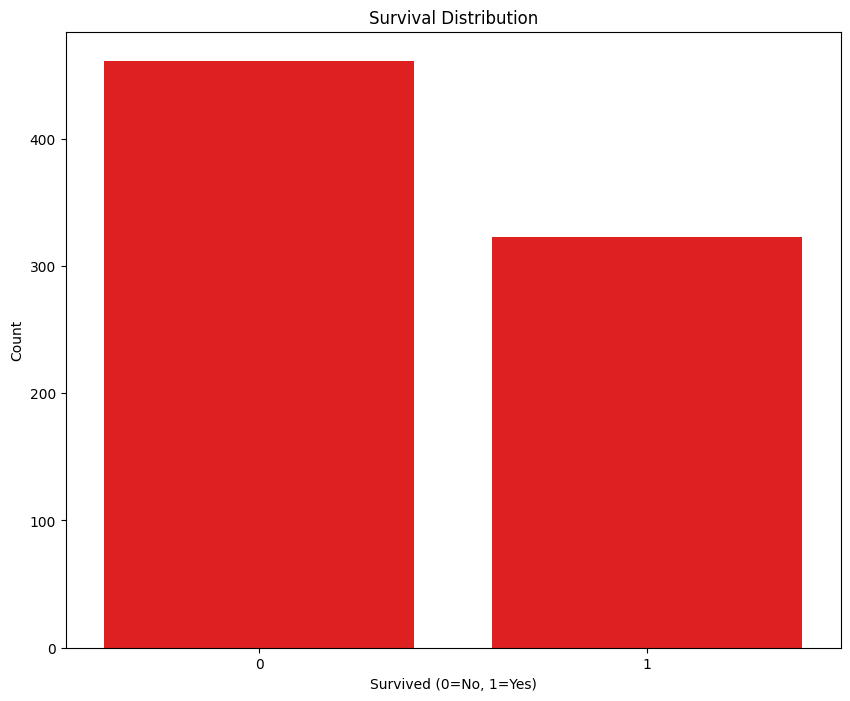

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(x='survived',data=df, color='red')
plt.title("Survival Distribution")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

### 2.Survival by Gender
* Gives information of which gender more likely to survive
* Strong predictor -> feature importance

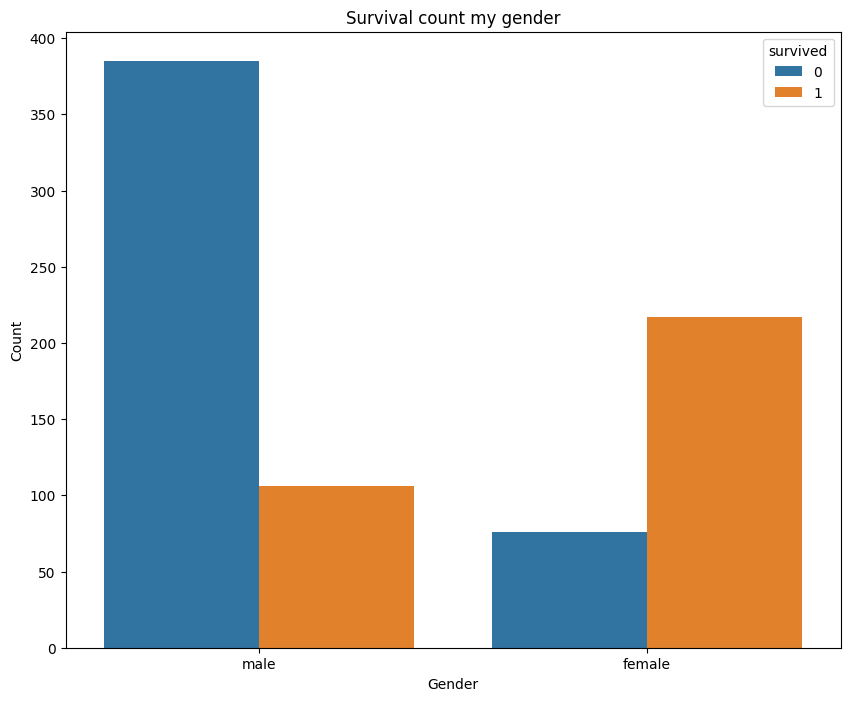

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(x='sex',hue='survived',data = df) ## hue breaks down male female count with respect to survival
plt.title("Survival count my gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### 3.Survival by Class
* Tells us which class of passengers are more likely to live.

Ex: Higher Class = Higher Chance of Survival

/tmp/ipython-input-499947767.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x='class',hue='survived',data=df , color='red')


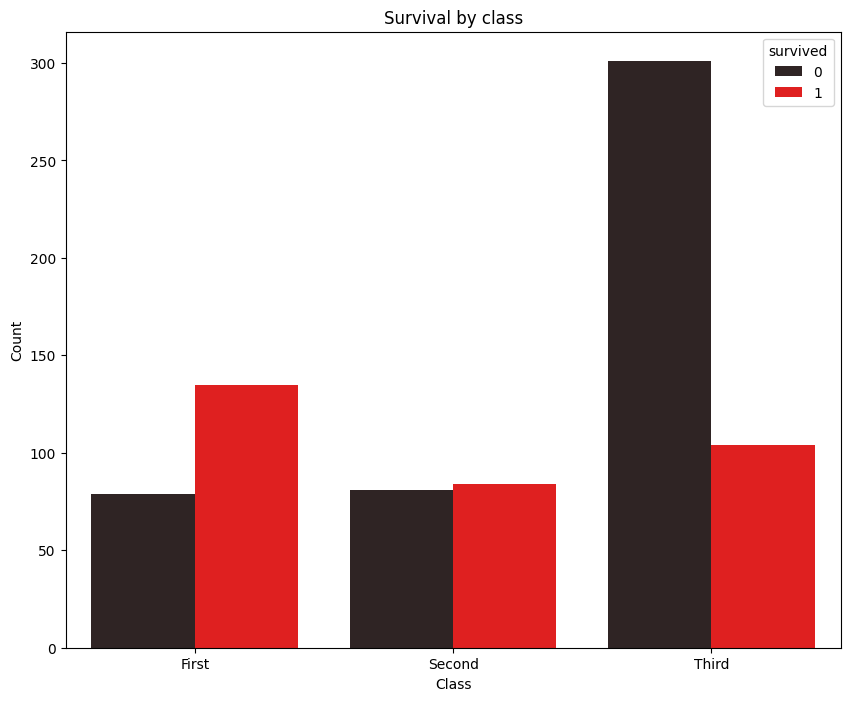

In [67]:
plt.figure(figsize=(10,8))
sns.countplot(x='class',hue='survived',data=df , color='red')
plt.title("Survival by class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 4.Age Distribution of Survivors vs non-Survivors
* Shows us important informations like young passengers may have slightly higher survival, etc..

/tmp/ipython-input-3572562348.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived']==0]['age'] , label = 'Did not survive', shade=True)
/tmp/ipython-input-3572562348.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived']==1]['age'] , label= 'Did Survive', shade=True)


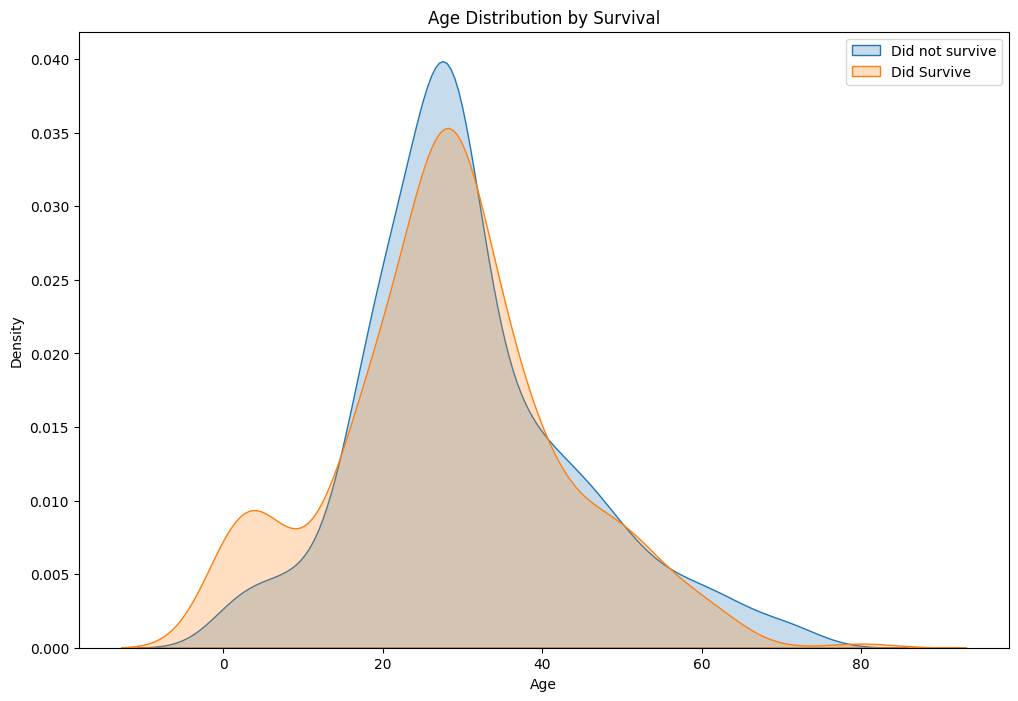

In [69]:
plt.figure(figsize=(12,8))
sns.kdeplot(df[df['survived']==0]['age'] , label = 'Did not survive', shade=True)
sns.kdeplot(df[df['survived']==1]['age'] , label= 'Did Survive', shade=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

## 5. Fare distribution by Survival
* Shows info like higher fare might pose higher survival chances




/tmp/ipython-input-2542632163.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived']==0]['fare'],label= 'Did not survive', shade= True)
/tmp/ipython-input-2542632163.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived']==1]['fare'],label='Did survive', shade=True)


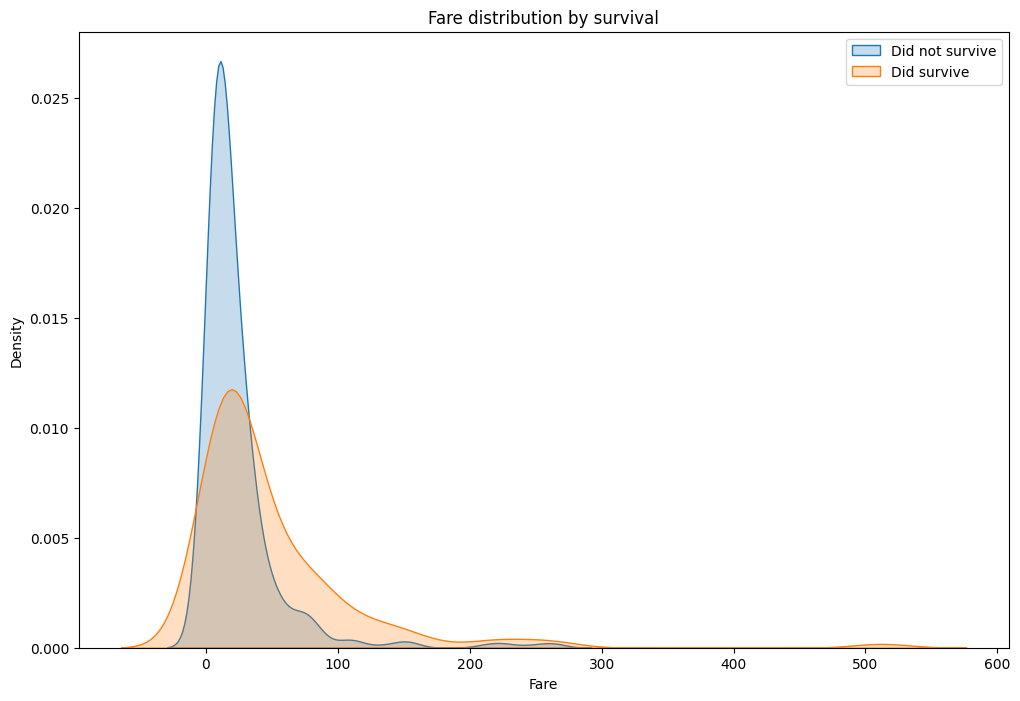

In [70]:
plt.figure(figsize=(12,8))
sns.kdeplot(df[df['survived']==0]['fare'],label= 'Did not survive', shade= True)
sns.kdeplot(df[df['survived']==1]['fare'],label='Did survive', shade=True)
plt.title("Fare distribution by survival")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()

### Visualisation Summary

The visual analysis revealed meaningful patterns:
- Women had higher survival rates than men.
- Higher class passengers were more likely to survive.
- Younger passengers had slightly higher survival probability.
- Higher fare also correlated with increased survival chances.

These insights help identify which features are likely to be influential in predicting survial

In [ ]:
## ===============================================================

## Feature Engineering
Feature Engineering is performed to prepare the dataset for machine learning models. This step involves converting categorical variables into numerical format, selecting relevant features,and removing columns that do not contribute to survival prediction. These transformations ensure compatibility with the Logistic Regression algorithm.

In [102]:
## One-hot encoding
cat_cols = df.select_dtypes(include=['object']).columns
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)


In [157]:
## Feature selection
df['family_size'] = df['sibsp'] + df['parch'] + 1
selected_features=df[['sex_male','pclass','age','fare','family_size']]

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 784 non-null    int64   
 1   pclass                   784 non-null    int64   
 2   age                      784 non-null    float64 
 3   sibsp                    784 non-null    int64   
 4   parch                    784 non-null    int64   
 5   fare                     784 non-null    float64 
 6   class                    784 non-null    category
 7   adult_male               784 non-null    bool    
 8   alone                    784 non-null    bool    
 9   sex_male                 784 non-null    bool    
 10  embarked_Q               784 non-null    bool    
 11  embarked_S               784 non-null    bool    
 12  who_man                  784 non-null    bool    
 13  who_woman                784 non-null    bool    
 14  embark_tow

In [78]:
## ============================================================

## Model Training and Evaluation

**-** After completing exploratory data analysis and Visualisation, the dataset is prepared for building a classification model.
  In this step, we'll be dividing the dataset into training and testing sets to evaluate the model's perfomance on unseen data. A classification algorithm is then trained using the training data, followed by evaluating its accuracy using appropriate perfomance metric.


In [159]:
##  ========================= TRAIN/TEST SPLIT ============================

# Redefine X to include the one-hot encoded 'sex_male' column from the processed df
X =selected_features
y=df['survived']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2 , random_state=42)

In [160]:
## ======================== MODEL ====================================
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [161]:
## ====================== PREDICTION ==================================
y_pred=model.predict(X_test)

accuracy= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

cm=confusion_matrix(y_test,y_pred)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
print("Confusion Matrix:\n",cm)

Accuracy: 0.7898089171974523
Precision: 0.78125
Recall: 0.7246376811594203
F1 Score: 0.7518796992481203
Confusion Matrix:
 [[74 14]
 [19 50]]


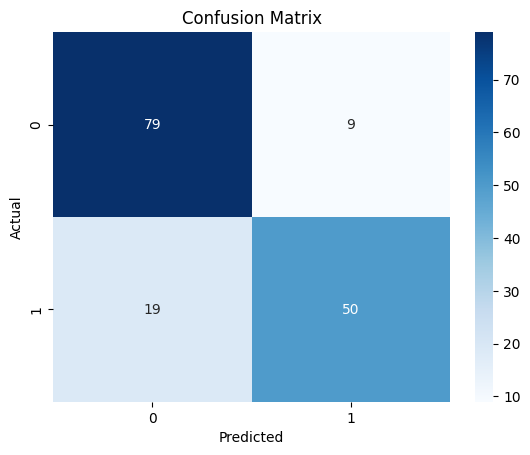

In [154]:
## Confusion Matrix Visualisation
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model Evaluation Summary

The Logistic Regression model achieved strong performance in predicting passenger survival. The evaluation metrics demonstrate that gender, passenger class, age, fare, and family size are effective predictors. The confusion matrix shows balanced classification performance, confirming the suitability of Logistic Regression for this binary classification problem.


***------------------------------ CONCLUSION ----------------------------***
* The Titanic Dataset was successfully analyzed to understand its structure, features, and target variable related to passenger survival.
* Initial Analysis confirmed the presence of missing values and duplicate entries, which were appropriately handled during preprocessing.
* Exploratory Data Analysis and Visualizations revealed clear survival patterns influenced by factors such as gender, passenger, class, age, fare and family size.
* Feature engineering techiques include one-hot encoding which were applied to prepare data for modeling.
* The dataset was split into training and testing sets to evaluate model perfomance on unseen data.
* A Logistic Regression classifier was trained and achieved strong predictive perfomance, demonstrating that the selected features are effective for predicting passenger survival.